In [1]:
# Initial import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
# Read in data
donor_metadata = pd.read_excel("./../data/sea-ad_cohort_donor_metadata_072524.xlsx")
neuropath = pd.read_csv("./../data/sea-ad_all_mtg_quant_neuropath_bydonorid_081122.csv")
mri = pd.read_excel("./../data/sea-ad_cohort_mri_volumetrics.xlsx")

# Read in luminex, taking into account the two rows used for the header
header_rows = pd.read_excel("./../data/sea-ad_cohort_mtg-tissue_extractions-luminex_data.xlsx", header=None, nrows=2)
combined_header = header_rows.astype(str).replace("nan", "").agg(''.join, axis=0)
luminex = pd.read_excel("./../data/sea-ad_cohort_mtg-tissue_extractions-luminex_data.xlsx", header=None, skiprows=2)
luminex.columns = combined_header

df = pd.merge(pd.merge(pd.merge(donor_metadata, neuropath, on="Donor ID"), mri, on="Donor ID"), luminex, on="Donor ID")

# Add columns for dementia types
df["vascular_dementia"] = df["Consensus Clinical Dx (choice=Vascular Dementia)"] == 'Checked'
df["alzheimers_dementia"] = (df["Consensus Clinical Dx (choice=Alzheimers disease)"] == "Checked") | (df["Consensus Clinical Dx (choice=Alzheimers Possible/ Probable)"] == "Checked")
df["control"] = df["Consensus Clinical Dx (choice=Control)"] == 'Checked'

# Print out head view
df.head()

,Donor ID,Primary Study Name,Secondary Study Name,Age at Death,Sex,Race (choice=White),Race (choice=Black/ African American),Race (choice=Asian),Race (choice=American Indian/ Alaska Native),Race (choice=Native Hawaiian or Pacific Islander),...,ABeta42 pg/ug,tTAU pg/ug,pTAU pg/ug,GuHCl (Guanidine Hydrochloride) Buffer Tissue extractionsABeta40 pg/ug,ABeta42 pg/ug,tTAU pg/ug,pTAU pg/ug,vascular_dementia,alzheimers_dementia,control
0,H19.33.004,ACT,NaN,80,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,0.971579,1552.414737,1.901053,1.409474,9.487368,93.387368,1.493684,False,False,True
1,H20.33.001,ACT,NaN,82,Male,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,2.744211,756.090526,2.737895,1.015616,7.822105,76.413684,1.580000,False,False,True
2,H20.33.002,ACT,NaN,97,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,0.147158,313.525263,2.615789,0.100708,0.610526,31.521053,1.068421,False,False,True
3,H20.33.004,ACT,NaN,86,Male,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,80.266316,318.528421,7.412632,91.172000,226.900000,44.423158,2.397895,False,True,False
4,H20.33.005,ACT,NaN,99,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,16.156842,107.348421,1.327368,28.778000,121.266000,10.516842,0.545263,False,False,True


In [3]:
# Initial exploratory counts
print(f"Number of Alzheimer's cases: {sum(df.alzheimers_dementia)}")
print(f"Number of control cases: {sum(df.control)}")

Number of Alzheimer's cases: 31
Number of control cases: 32


In [4]:
# Print out counts across atherosclerosis severity and cognitive status
crosstab = pd.crosstab(df['Cognitive Status'], df['Atherosclerosis'])
crosstab = crosstab.reindex(index=['Dementia', 'No dementia'], columns=['Mild', 'Moderate', 'Severe'], fill_value=0)

# Display the crosstab
print(crosstab)

Atherosclerosis   Mild  Moderate  Severe
Cognitive Status                        
Dementia            10        28       3
No dementia         12        23       1


In [5]:
# Print out counts across atherosclerosis severity and AD Neuropathological change scores
crosstab = pd.crosstab(df['Overall AD neuropathological Change'], df['Atherosclerosis'])
crosstab = crosstab.reindex(index=['Not AD', 'Low', 'Intermediate', 'High'], columns=['Mild', 'Moderate', 'Severe'], fill_value=0)

# Display the crosstab
print(crosstab)

Atherosclerosis                      Mild  Moderate  Severe
Overall AD neuropathological Change                        
Not AD                                  2         6       0
Low                                     6         5       0
Intermediate                            5        12       1
High                                    9        28       3


<Axes: xlabel='Age at Death', ylabel='Left Hippocampus Volume'>

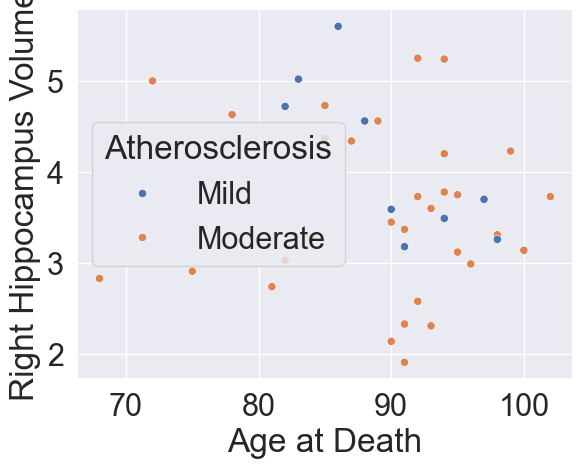

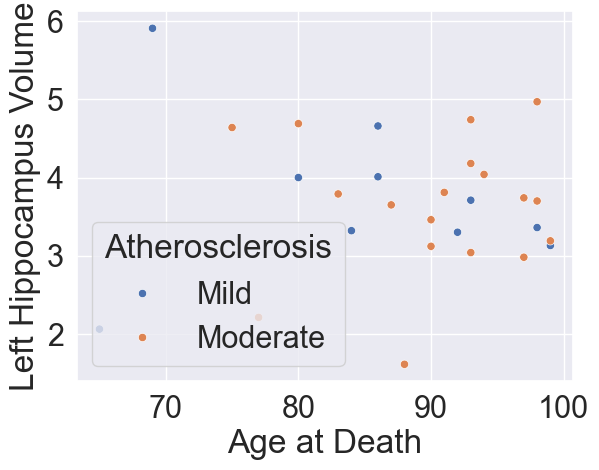

In [9]:
# Print out scatterplot of Right/Left HC volume over age
sns.scatterplot(data=df, x='Age at Death', y='Right Hippocampus Volume', hue='Atherosclerosis')
plt.figure()
sns.scatterplot(data=df, x='Age at Death', y='Left Hippocampus Volume', hue='Atherosclerosis')


Count of individuals with mild atherosclerosis who have left HC volume: 10
Count of individuals with mild atherosclerosis who have right HC volume: 9
Count of individuals with moderate atherosclerosis who have left HC volume: 18
Count of individuals with moderate atherosclerosis who have right HC volume: 31


Statistics for Right Hippocampus Volume between mild and moderate atherosclerosis patients
t-statistic: -1.626303153411254
p-value: 0.1121508736141162
mean(moderate) - mean(mild): -0.557347670250897


Statistics for Left Hippocampus Volume between mild and moderate atherosclerosis patients
t-statistic: -0.28303960788294
p-value: 0.7793878176758544
mean(moderate) - mean(mild): -0.10377777777777775


/var/folders/4j/0g3dxy6901134lp72sg7z5sm0000gp/T/ipykernel_20878/3540168567.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Atherosclerosis", y=outcome, palette="viridis", capsize = 0.1, width=0.3)
/var/folders/4j/0g3dxy6901134lp72sg7z5sm0000gp/T/ipykernel_20878/3540168567.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Atherosclerosis", y=outcome, palette="viridis", capsize = 0.1, width=0.3)


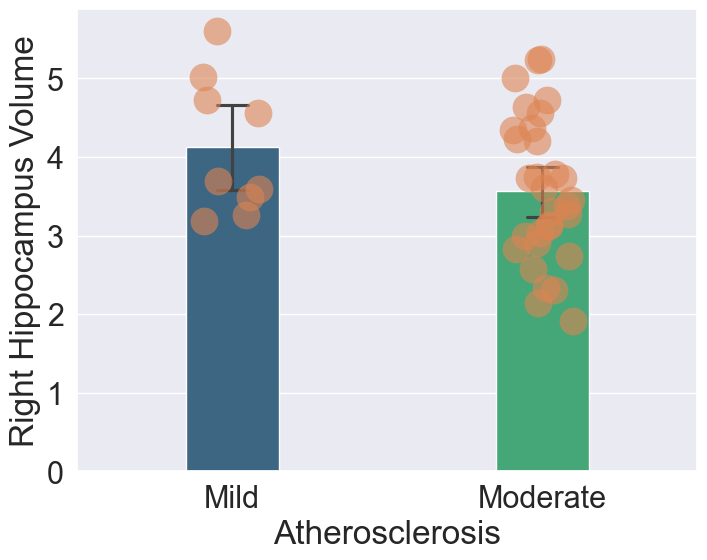

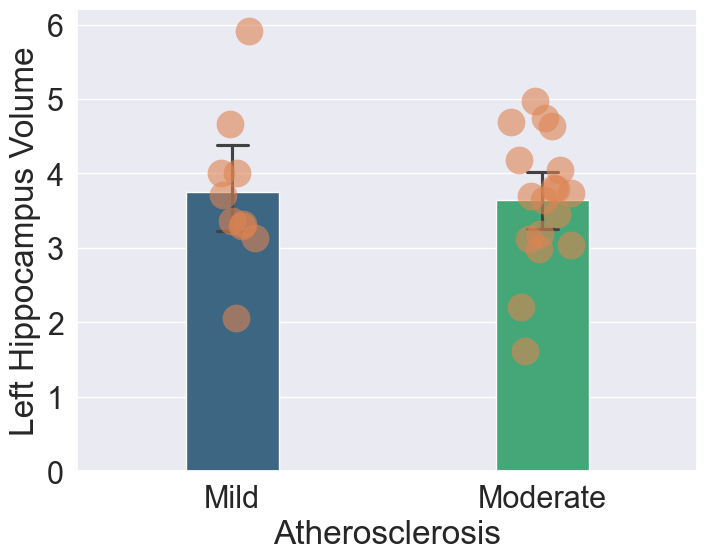

In [8]:
# Plot barplots comparing hippocampus volume between mild and moderate atherosclerosis patients
df = df[df["Atherosclerosis"] != "Severe"]

# outcome = "Last MMSE Score"

print(f"Count of individuals with mild atherosclerosis who have left HC volume: {df[df["Atherosclerosis"] == "Mild"]["Left Hippocampus Volume"].count()}")
print(f"Count of individuals with mild atherosclerosis who have right HC volume: {df[df["Atherosclerosis"] == "Mild"]["Right Hippocampus Volume"].count()}")
print(f"Count of individuals with moderate atherosclerosis who have left HC volume: {df[df["Atherosclerosis"] == "Moderate"]["Left Hippocampus Volume"].count()}")
print(f"Count of individuals with moderate atherosclerosis who have right HC volume: {df[df["Atherosclerosis"] == "Moderate"]["Right Hippocampus Volume"].count()}")

for outcome in ["Right Hippocampus Volume", "Left Hippocampus Volume"]:
    print(f"\n\nStatistics for {outcome} between mild and moderate atherosclerosis patients")
    sns.set(style="whitegrid")
    sns.set(font_scale=2)

    plt.figure(figsize=(8,6))
    ax = sns.barplot(data=df, x="Atherosclerosis", y=outcome, palette="viridis", capsize = 0.1, width=0.3)

    sns.stripplot(
        x="Atherosclerosis", 
        y=outcome, 
        # hue="Cognitive Status", 
        data=df, dodge=True, alpha=0.6, ax=ax, size=20
    )
    t_stat, p_val = ttest_ind(df[df["Atherosclerosis"] == "Moderate"][outcome],df[df["Atherosclerosis"] == "Mild"][outcome], nan_policy="omit")
    print("t-statistic:", t_stat)
    print("p-value:", p_val)
    print("mean(moderate) - mean(mild):", np.nanmean(df[df["Atherosclerosis"] == "Moderate"][outcome]) - np.nanmean(df[df["Atherosclerosis"] == "Mild"][outcome]))
